자연어 처리 : 음성/텍스트를 컴퓨터로 인식/처리하는 프로세스

텍스트를 전처리하는 과정이 반드시 필요하다.

문장을 작은 텍스트로 나눌 수 있다. 이 중 가장 작은 단위를 token이라고 부른다. 이 과정은 tokenization이라고 한다.

keras에서는 text_to_word_sequence()를 제공하여 단어 단위로 문장을 분해할 수 있다.

In [ ]:
# 외부 라이브러리 import

import numpy
import tensorflow as tf
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.utils import to_categorical


#주어진 문장을 '단어'로 토큰화 하기

#케라스의 텍스트 전처리와 관련한 함수중 text_to_word_sequence 함수를 불러 옵니다.
from tensorflow.keras.preprocessing.text import text_to_word_sequence
 
# 전처리할 텍스트를 정합니다.
text = 'i got to do that'
 
# 해당 텍스트를 토큰화 합니다.
result = text_to_word_sequence(text)
print("\n원문:\n", text)
print("\n토큰화:\n", result)


원문:
 i got to do that

토큰화:
 ['i', 'got', 'to', 'do', 'that']


이렇게 리스트로 반환해준다.

----

단어의 빈도 수 등을 이용해서 주요 단어를 파악할 수 있다.

bag of words 기법은 하나의 단어의 개수를 세는 기법이다. tokenizer()를 이용하면 쉽게 계산할 수 있다.

In [ ]:
#단어 빈도수 세기

#전처리 하려는 세개의 문장을 정합니다.
 
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
       '텍스트의 단어로 토큰화 해야 딥러닝에서 인식됩니다.',
       '토큰화 한 결과는 딥러닝에서 사용 할 수 있습니다.',
       ]
 
# 토큰화 함수를 이용해 전처리 하는 과정
token = Tokenizer()             # 토큰화 함수 지정
token.fit_on_texts(docs)       # 토큰화 함수에 문장 적용
print(token.word_counts)

# OrderedDict 클래스로 나온다. 

#단어의 빈도수를 계산한 결과를 각 옵션에 맞추어 출력합니다. 
 
print("\n단어 카운트:\n", token.word_counts) 
#Tokenizer()의 word_counts 함수는 순서를 기억하는 OrderedDict클래스를 사용합니다.
 
#출력되는 순서는 랜덤입니다. 
print("\n문장 카운트: ", token.document_count)
print("\n각 단어가 몇개의 문장에 포함되어 있는가:\n", token.word_docs)
print("\n각 단어에 매겨진 인덱스 값:\n",  token.word_index)

# token.words_counts : 총 몇 번 나왔는가
# token.document_count : 주어진 doc에 몇 개의 문장이 있나
# token.word_docs : 총 몇개의 문장에서 해당 단어가 나오는가
# token.word_index : 각 단어의 인덱스 값

OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])

단어 카운트:
 OrderedDict([('먼저', 1), ('텍스트의', 2), ('각', 1), ('단어를', 1), ('나누어', 1), ('토큰화', 3), ('합니다', 1), ('단어로', 1), ('해야', 1), ('딥러닝에서', 2), ('인식됩니다', 1), ('한', 1), ('결과는', 1), ('사용', 1), ('할', 1), ('수', 1), ('있습니다', 1)])

문장 카운트:  3

각 단어가 몇개의 문장에 포함되어 있는가:
 defaultdict(<class 'int'>, {'먼저': 1, '토큰화': 3, '나누어': 1, '단어를': 1, '각': 1, '합니다': 1, '텍스트의': 2, '단어로': 1, '해야': 1, '딥러닝에서': 2, '인식됩니다': 1, '할': 1, '사용': 1, '결과는': 1, '한': 1, '수': 1, '있습니다': 1})

각 단어에 매겨진 인덱스 값:
 {'토큰화': 1, '텍스트의': 2, '딥러닝에서': 3, '먼저': 4, '각': 5, '단어를': 6, '나누어': 7, '합니다': 8, '단어로': 9, '해야': 10, '인식됩니다': 11, '한': 12, '결과는': 13, '사용': 14, '할': 15, '수': 16, '있습니다': 17}


# one hot incoding 
각 단어를 하나의 배열로 두고, 각 단어를 그 배열로 표시한다.

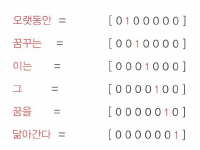

In [ ]:


text2 = 'hello this is mike speaking... hey'

token2 = Tokenizer()
token2.fit_on_texts([text2])  # doc을 보면 여러개의 string이 들어가있다. 그 형식에 맞춰서 string을 담은 list로 넣어준다. 
print(token2.word_index)

# texts_to_sequences : token의 index로 채워진 배열을 만든다.
x = token2.texts_to_sequences([text2])
print(x)
print('\n')

# to_categorical : index의 배열로 one hot incoding을 한다.
word_size2 = len(token2.word_index) + 1
x = to_categorical(x, num_classes = word_size2)
print(x)

{'hello': 1, 'this': 2, 'is': 3, 'mike': 4, 'speaking': 5, 'hey': 6}
[[1, 2, 3, 4, 5, 6]]


[[[0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]


원핫인코딩은 벡터의 길이가 길다. 이를 위해 word embedding을 한다.

각 단어의 유사도를 계산해서 정렬하기에, word embedding이 공간 낭비가 적다. 각 단어의 유사도를 기준으로 배열을 새로운 수치의 배열로 변경한다.

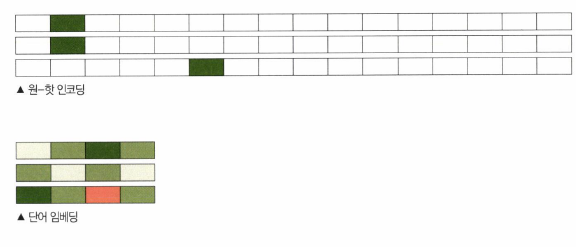

Q : 단어의 유사도 계산 방법?

오차역전파 이용 - 최적의 유사도를 계산하는 학습 과정을 거친다.



In [ ]:
#################################
# NLP에서의 one hot incoding

# 텍스트 리뷰 자료를 지정합니다.
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다","한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요","연기가 어색해요","재미없어요"]

# 긍정 리뷰는 1, 부정 리뷰는 0으로 클래스를 지정합니다.
classes = array([1,1,1,1,1,0,0,0,0,0])

# 토큰화 
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)

# 인덱스를 이용하여 원핫인코딩 진행
x = token.texts_to_sequences(docs)
print("\n리뷰 텍스트, 토큰화 결과:\n",  x)
# [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]
# 각 문장 별로 배열이 생성됨. 그냥 문장의 각 단어에 번호 먹이고, 그 번호로 문장을 쓴 것

# 모델에 입력값으로 넣으려면 각각의 데이터의 길이가 동일해야한다.
# 따라서, 패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.
padded_x = pad_sequences(x, 4)  
print("\n패딩 결과:\n", padded_x)
 
# 딥러닝 모델
print("\n딥러닝 모델 시작: \n")

# 임베딩에는 입력, 출력, 단어수 세가지 인자가 필요하다.
# 임베딩에 입력될 단어의 수를 지정합니다. 전체 단어의 맨 앞에 0이 먼저 나와야하므로 1을 더 해준다.
word_size = len(token.word_index) +1
 
# 단어 임베딩을 포함하여 딥러닝 모델을 만들고 결과를 출력합니다.
# Embedding() 함수 : 입력/출력 두 가지의 매개변수를 요구한다.
# Deep Learning Layer로 추가된다.
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4))    # 입력 단어 수 word_size, 출력 벡터 크기 8, 단어 입력은 4개 씩
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(padded_x, classes, epochs=20)

print("\n Accuracy: %.4f" % (model.evaluate(padded_x, classes)[1]))

{'너무': 1, '재밌네요': 2, '최고예요': 3, '참': 4, '잘': 5, '만든': 6, '영화예요': 7, '추천하고': 8, '싶은': 9, '영화입니다': 10, '한번': 11, '더': 12, '보고싶네요': 13, '글쎄요': 14, '별로예요': 15, '생각보다': 16, '지루하네요': 17, '연기가': 18, '어색해요': 19, '재미없어요': 20}

리뷰 텍스트, 토큰화 결과:
 [[1, 2], [3], [4, 5, 6, 7], [8, 9, 10], [11, 12, 13], [14], [15], [16, 17], [18, 19], [20]]

패딩 결과:
 [[ 0  0  1  2]
 [ 0  0  0  3]
 [ 4  5  6  7]
 [ 0  8  9 10]
 [ 0 11 12 13]
 [ 0  0  0 14]
 [ 0  0  0 15]
 [ 0  0 16 17]
 [ 0  0 18 19]
 [ 0  0  0 20]]

딥러닝 모델 시작:
Epoch 1/20
1/1 [==============================] - 1s 849ms/step - loss: 0.6816 - accuracy: 0.8000
Epoch 2/20
1/1 [==============================] - 0s 11ms/step - loss: 0.6798 - accuracy: 0.8000
Epoch 3/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6779 - accuracy: 0.8000
Epoch 4/20
1/1 [==============================] - 0s 5ms/step - loss: 0.6761 - accuracy: 0.8000
Epoch 5/20
1/1 [==============================] - 0s 6ms/step - loss: 0.6743 - accuracy: 0.8000
Epoch 6/20
1/1 [==